In [6]:
import numpy as np

## 1.1 Squared numbers

In [1]:
%%timeit
l = []
N = 1000000
for i in range(N):
    l.append(i**2)


291 ms ± 3.16 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [3]:
# using list comprehension
N = 1000000
%timeit [i**2 for i in range(N)]

249 ms ± 3.19 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [5]:
# With numpy
import numpy as np
%timeit a = np.arange(N)**2

1.63 ms ± 2.54 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)


## 1.2 Calculation of pi

In [7]:
k = np.arange(100)
np.sqrt(12)*np.sum( (-1)**k/( 3**k * (2*k+1) ))

3.1415926535897927

## Allan variance

In [9]:
def allan(data):
    return np.mean((data[1:] - data[:-1])**2)/2

In [13]:
allan(np.random.rand(100000))

0.08384113727374612

In [18]:
def average_frequency(data, n):
    data = data[len(data)%n:] # remove data if len(data) is not a multiple of n
    data = data.reshape((len(data)//n, n))
    return data.mean(axis=1)

In [19]:
def allan_variance(data, n):
    return allan(average_frequency(data, n))

allan_variance(np.random.rand(100000), 10)

0.008513633465580097

## Measurement of pi (Monte Carlo)

3.14392


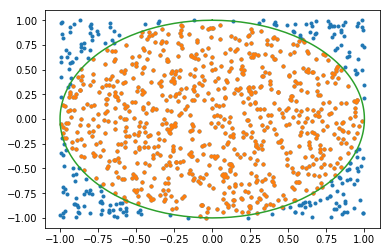

In [5]:
import numpy as np
from numpy import pi
from numpy.random import rand
import matplotlib.pyplot as plt

N = 1000
X = 2*rand(N)-1
Y = 2*rand(N)-1
plt.figure()
plt.plot(X,Y, '.')
cond = (X**2 + Y**2)<1
plt.plot(X[cond],Y[cond], '.')
theta = np.linspace(0, 2*pi, 201)
plt.plot(np.sin(theta), np.cos(theta))
def mesure_pi(N):
    X = 2*rand(N)-1
    Y = 2*rand(N)-1
    Nb_points = np.sum((X**2 + Y**2)<1)
    return 4*Nb_points/float(N)
print(mesure_pi(1000000))

## Fit of inteference fringes

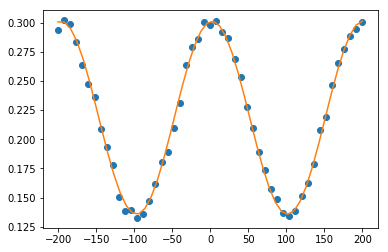

In [12]:
import numpy as np
from numpy import cos, pi
from scipy.optimize import curve_fit
import matplotlib.pyplot as plt

data = np.loadtxt('data/fit_sinus.dat')
Freq = data[:,0]
Y = data[:,1]

def fringe(x,offset, amplitude, center, Delta_f):
    "y = offset + amplitude* (1+cos(2*pi*(x-center)/Delta_f))/2"
    return offset + amplitude* (1+cos(2*pi*(x-center)/Delta_f))/2

param_ini = [0.12, .2, 0., 200.]

plt.plot(Freq, Y, 'o')
x_fit = np.linspace(min(Freq), max(Freq))
#plot(x_fit, fringe(x_fit, *param_ini))
popt, cov = curve_fit(fringe, Freq, Y, p0=param_ini)
offset, amplitude, center, Delta_f = popt
sigma_offset, sigma_amplitude, sigma_center, sigma_Delta_f = np.sqrt(np.diag(cov))
plt.plot(x_fit, fringe(x_fit, *popt))

## Fit of a picture

Distance :  12.465268157831185


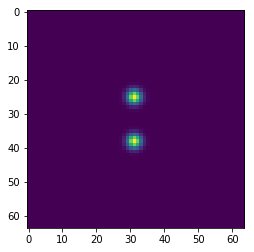

In [21]:
import numpy as np
from scipy.optimize import curve_fit
import matplotlib.pyplot as plt


image = np.loadtxt('data/double_star.txt')
ny, nx = image.shape
X,Y = np.meshgrid(range(nx), range(ny))
# two column matrices with X and Y
XY = np.array([X.flatten(), Y.flatten()]).transpose()

def gauss(XY, amplitude, center_x, center_y, diameter):
    x = XY[:,0]
    y = XY[:,1]
    return amplitude*np.exp(-((x-center_x)**2 + (y-center_y)**2)/diameter**2)

def model(XY, *param):
    return gauss(XY, *param[:4]) + gauss(XY, *param[4:8]) + param[8]


plt.imshow(image, interpolation = 'nearest')
# Measured position of the center using the imshow figure.
x0, y0 = 31, 25
x1, y1 = 31, 38
p0 = [200, x0, y0, 2, 200, x1, y1, 2, 0.2]
# One can look at the initial parameters
image_test = model(XY, *p0).reshape(X.shape)
plt.imshow(image_test, interpolation = 'nearest')
popt, pcov = curve_fit(model, XY, image.flatten(), p0)
print("Distance : ", np.hypot(popt[1] - popt[5], popt[2] - popt[6]))

## 4.1 The pendulum equation

(-3.141592653589793, 3.141592653589793)

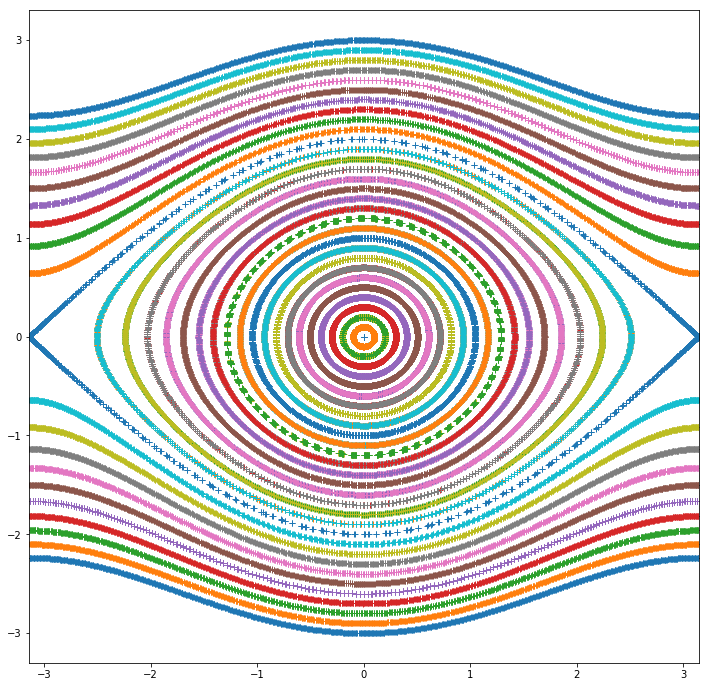

In [28]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import ode

def f(t, Y):
    y, yprime=Y
    return np.array([yprime, -sin(y)])

def pendule(theta_0, vit_ang, T, N=1000):
    r = ode(f).set_integrator('vode')
    r.set_initial_value(np.array([theta_0, vit_ang]),0)
    TT = np.linspace(0,T,N+1)
    output = [[0, theta_0, vit_ang]] # Output is a list of list
    for i, t in enumerate(TT[1:]):
        r.integrate(t)
        output.append([t, r.y[0], r.y[1]])
    return np.array(output) # This is a 2D array

plt.figure(figsize=(12,12))
Tvit_ini = np.linspace(-3,3, 61)
for vit_ini in Tvit_ini:
    a = pendule(0, vit_ini, 100)
    a[:,1] = ((a[:,1]+pi)%(2*pi) - pi) # Tricks to be between -pi and pi
    plt.plot(a[:,1], a[:,2], '+')

plt.xlim(-pi,pi)